In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('HousingData.csv')

In [37]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [38]:
df.shape

(506, 14)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [40]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [41]:
missing_cols = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", missing_cols)

Columns with missing values: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']


In [42]:
# filling missing values with mean
# for col in missing_cols:
#     df[col] = df[col].fillna(df[col].mean())

In [43]:
# df.head()

In [44]:
# filling missing values using simple imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[missing_cols] = imputer.fit_transform(df[missing_cols])
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [45]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [ ]:
# correlation
corr = df.corr(numeric_only=True)["MEDV"].sort_values(ascending=False)
corr

MEDV       1.000000
RM         0.695360
ZN         0.365943
B          0.333461
DIS        0.249929
CHAS       0.179882
CRIM      -0.379695
AGE       -0.380223
RAD       -0.381626
NOX       -0.427321
TAX       -0.468536
INDUS     -0.478657
PTRATIO   -0.507787
LSTAT     -0.721975
Name: MEDV, dtype: float64

<Axes: xlabel='RM', ylabel='MEDV'>

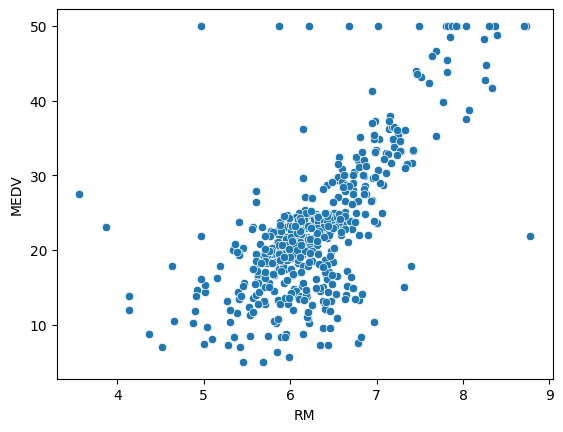

In [47]:
sns.scatterplot(x='RM', y='MEDV', data=df)

<Axes: xlabel='CRIM', ylabel='MEDV'>

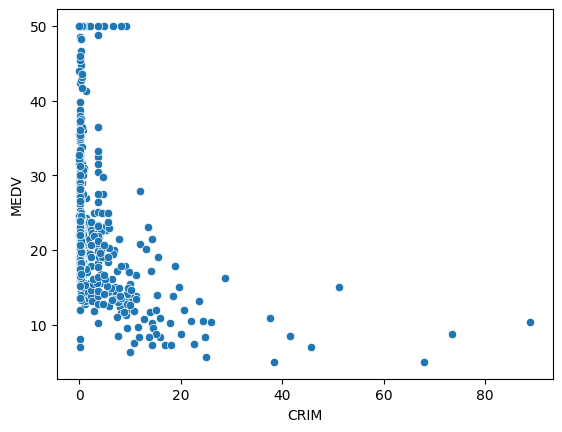

In [ ]:
sns.scatterplot(x='CRIM', y='MEDV', data=df)

<Axes: xlabel='ZN', ylabel='MEDV'>

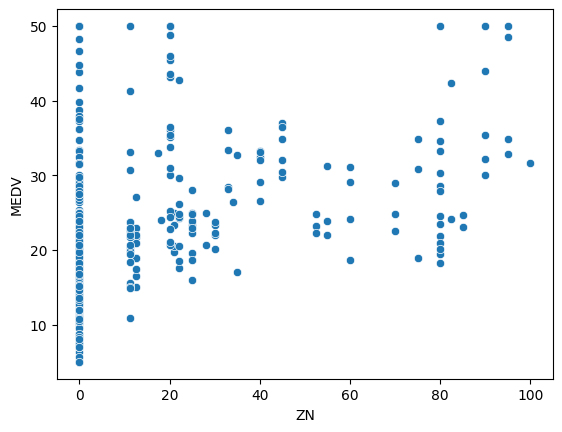

In [ ]:
sns.scatterplot(x='ZN', y='MEDV', data=df)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

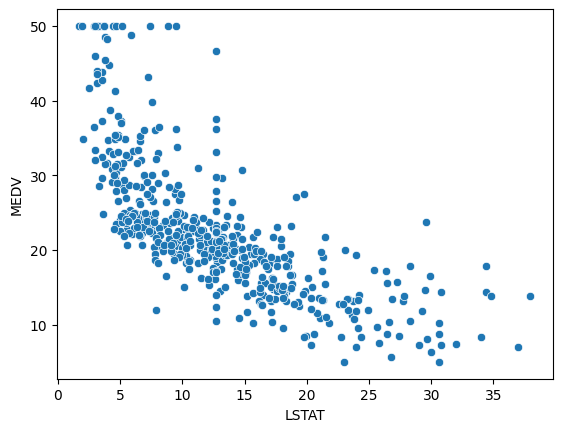

In [ ]:
sns.scatterplot(x='LSTAT', y='MEDV', data=df)

<Axes: xlabel='RM', ylabel='MEDV'>

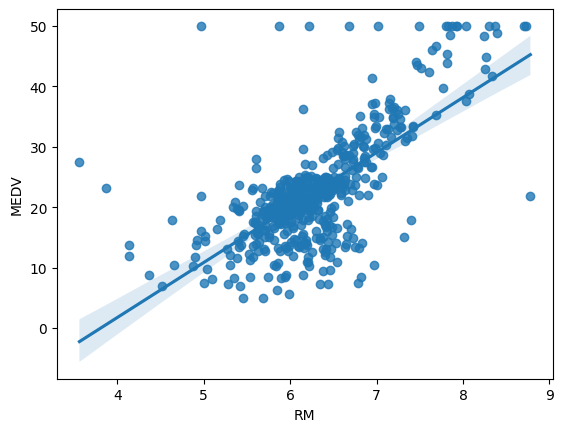

In [51]:
sns.regplot(x='RM', y='MEDV', data=df)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

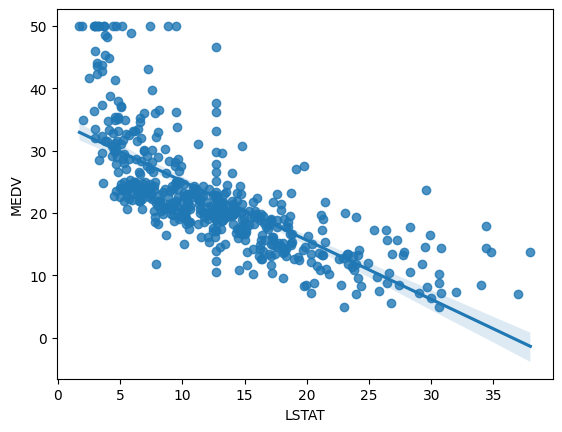

In [52]:
sns.regplot(x="LSTAT", y='MEDV', data=df)

In [53]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [54]:
df["CHAS"].value_counts()

CHAS
0.000000    452
1.000000     34
0.069959     20
Name: count, dtype: int64

In [55]:
df["RAD"].value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: count, dtype: int64

In [56]:
# separating features and target variable
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [ ]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [58]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
X_train_scaled

array([[ 1.29816269, -0.50218688,  1.076879  , ...,  0.84534281,
        -0.07433689,  1.78567409],
       [-0.33812201, -0.50218688, -0.41044738, ...,  1.20474139,
         0.4301838 , -0.57766635],
       [-0.40549311, -0.01232664, -0.72105369, ..., -0.63717631,
         0.06529747, -0.66966987],
       ...,
       [-0.40772657,  2.99309047, -1.32584002, ..., -0.59225149,
         0.37901005, -0.93418   ],
       [ 0.85908493, -0.50218688,  1.076879  , ...,  0.84534281,
        -2.69458597,  1.54991507],
       [-0.38343124, -0.50218688, -0.3477288 , ...,  1.15981657,
        -3.12158061, -0.26715447]], shape=(404, 13))

In [ ]:
# model training on linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
# printting the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-1.00420142  0.66411045 -0.18169767  0.82178765 -1.88300173  3.36742995
 -0.53169579 -3.23884258  1.91161353 -1.51870251 -1.97228447  1.1214543
 -3.04990363]
Intercept: 22.796534653465347


In [63]:
# on which parameters the model is trained
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

In [ ]:
# predicting on test data
from sklearn.metrics import r2_score, root_mean_squared_error
y_pred = model.predict(X_test_scaled)
# accuracy
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Root Mean Squared Error: 5.001766890194189
R^2 Score: 0.6588520195508119


Text(0, 0.5, 'Predicted Values')

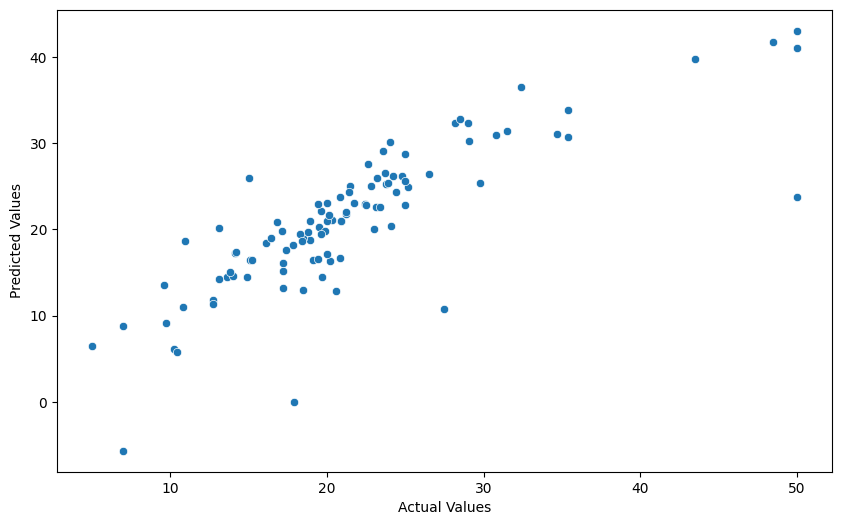

In [65]:
# ploting scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Text(13.819444444444445, 0.5, 'Frequency')

<Figure size 1000x600 with 0 Axes>

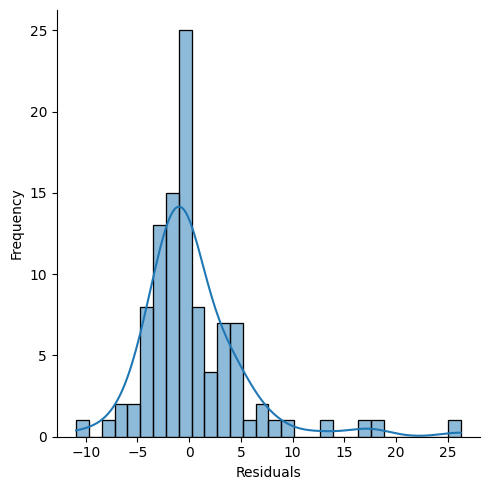

In [66]:
# ploting error/residuals
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.displot(errors, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")

In [67]:
errors

173    -5.543250
274    -4.135668
491    -0.892513
72     -2.281110
452    -2.356092
         ...    
412    17.871266
436    -3.937938
411     1.102861
86     -0.295804
75     -2.980823
Name: MEDV, Length: 102, dtype: float64

Text(0, 0.5, 'Errors')

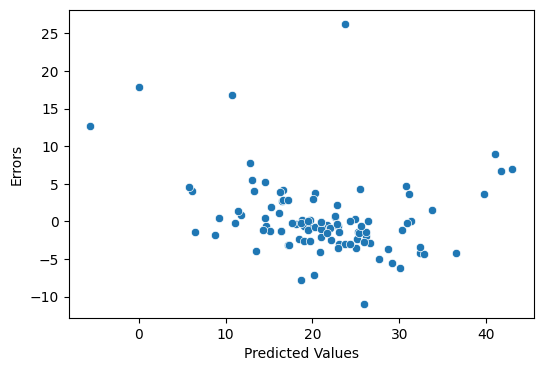

In [ ]:
# plotting the predictions vs errors
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=errors)
plt.xlabel("Predicted Values")
plt.ylabel("Errors")

In [73]:
# pickling the model for deployment
import joblib
joblib.dump(model, "boston_housing_model.pkl")

['boston_housing_model.pkl']